In [15]:
import zipfile
import json
import pandas as pd
import glob
from pandas import json_normalize
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Abre el archivo zip y extrae todos los archivos
with zipfile.ZipFile('C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\review-Hawaii-20240131T031035Z-001.zip' , 'r') as path:
    path.extractall('C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas')

In [6]:
# Ruta de la carpeta que contiene los archivos JSON
ruta_carpeta = 'C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\review-Hawaii'

# Crea una lista para almacenar los datos
datos_total = []

# Recorre cada archivo JSON en la carpeta
for nombre_archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
    # Leer cada linea de los archivos json
    if not os.path.isdir(ruta_archivo):
        # Leer cada linea de los archivos json
        with open(ruta_archivo, 'r') as f:
            for linea in f:
                # carga cada linea como un objeto Json individual
                datos_json = json.loads(linea)
                # agregar los datos a la lista
                datos_total.append(datos_json)

# Convierte los datos a un DataFrame y "desanida" los diccionarios
df_hawaii = json_normalize(datos_total)

# Desanida la columna 'resp'
if 'resp' in df_hawaii.columns:
    resp_desanidado = json_normalize(df_hawaii['resp'].dropna().tolist())
    resp_desanidado.index = df_hawaii['resp'].dropna().index
    df_hawaii = df_hawaii.drop(columns=['resp']).join(resp_desanidado)

# Ruta de salida para el archivo CSV
ruta_salida = 'PF_Data_Science\\datas\\Hawaii.csv'

# Guarda el DataFrame en un archivo CSV
df_hawaii.to_csv(ruta_salida, index=False, escapechar='\\')

print(f'Se ha guardado el archivo CSV en: {ruta_salida}')


Se ha guardado el archivo CSV en: PF_Data_Science\datas\Hawaii.csv


In [7]:
df_hawaii = pd.read_csv('PF_Data_Science\\datas\\Hawaii.csv')

In [8]:
df_hawaii.head()

,user_id,name,time,rating,text,pics,gmap_id,resp.time,resp.text
0,113965417079576625433,manuel grimaldo,1591839903487,5,Great new upgrade,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
1,116655819137293331166,Enrique Lara,1568059018979,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
2,100834119994550070853,Gregory Donaldson,1594885588335,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
3,103207214144482097315,Brian Baker,1575951131613,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
4,108526171163172578599,Kam J,1573076723916,3,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN


In [9]:
df_hawaii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504347 entries, 0 to 1504346
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1504347 non-null  object 
 1   name       1504336 non-null  object 
 2   time       1504347 non-null  int64  
 3   rating     1504347 non-null  int64  
 4   text       852582 non-null   object 
 5   pics       132702 non-null   object 
 6   gmap_id    1504347 non-null  object 
 7   resp.time  108799 non-null   float64
 8   resp.text  108799 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 103.3+ MB


In [10]:
df_hawaii.isnull().sum()

user_id            0
name              11
time               0
rating             0
text          651765
pics         1371645
gmap_id            0
resp.time    1395548
resp.text    1395548
dtype: int64

In [22]:
# revisamos la cantidad de fila duplicadas en el dataset
print(f'la cantidad de filas duplicadas es:', df_hawaii.duplicated().sum())

la cantidad de filas duplicadas es: 17616


In [12]:

# contamos la cantidad de reseñas de cada usuario 
df_hawaii.groupby(['user_id'])['name'].count()

user_id
100000149611993816967    52
100000298155224315422    13
100000489603334611039    63
100001036626793288881    14
100001187787951615454    11
                         ..
118445536629154643944    72
118445688041672711231    28
118446249639520739146    10
118446400473939303933    25
118446463806473801425    11
Name: name, Length: 64336, dtype: int64

In [13]:
df_hawaii[df_hawaii['name'].isnull()]

,user_id,name,time,rating,text,pics,gmap_id,resp.time,resp.text
153846,104151356548275175137,NaN,1484110593095,4,NaN,NaN,0x7954d2c1165bb83b:0xecbaf4753cacfe58,NaN,NaN
832430,104151356548275175137,NaN,1484110685160,5,What a great deal. Really fun and challenging ...,NaN,0x7954d3ee96160ec5:0xb374e7ef94e2ea16,NaN,NaN
892160,104151356548275175137,NaN,1484111648801,5,This is the easiest rental experience I have e...,NaN,0x7954c534e44dfaa3:0xca80bcae7889fa69,NaN,NaN
944136,104151356548275175137,NaN,1484110033119,4,You should listen to a talk about timeshares s...,NaN,0x79552b698645c7f1:0x265edb39613ebd42,NaN,NaN
960448,104151356548275175137,NaN,1483822288419,5,Gotta get one with mac nut icecream in the bot...,NaN,0x79552bb996f8a4cb:0x4c5051490fb8b512,NaN,NaN
1096058,104151356548275175137,NaN,1484111220122,4,We called in our order on our drive from the a...,NaN,0x7954d0735c0d9b3d:0xe0a6e57098a59a94,NaN,NaN
1342304,104151356548275175137,NaN,1484110273017,5,I hate to be like everyone else but you half t...,NaN,0x7954d074a6d82927:0xd3543519bb3e2afd,NaN,NaN
1348351,104151356548275175137,NaN,1484110089464,5,Incredible tropical treat. Get it with macadam...,NaN,0x7954d1b021100c3b:0x4245bc9926607de8,NaN,NaN
1349976,104151356548275175137,NaN,1484110817531,4,Best Pina Colada I've ever had. Great pizza. T...,NaN,0x7954d0735bcf9ac7:0x3e816a383f8f8e1,NaN,NaN
1353943,104151356548275175137,NaN,1483826717299,5,Best Luau I've ever been to. The fire knife da...,NaN,0x7954dadb97b5de09:0xd69f5c0d09fc9394,NaN,NaN


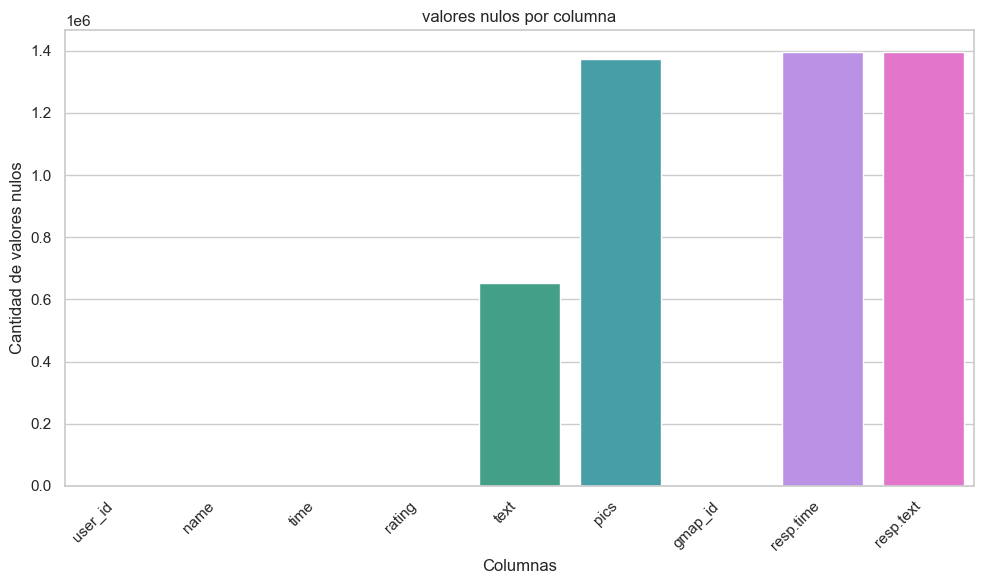

In [17]:
# Calcular el número de valores nulos en cada columna
nulos = df_hawaii.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='rainbow')
plt.title('valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cantidad muy grande de datos nulos en algunas columnas, esto puede ser posible debido a que en algunas ocasiones los usuarios solo califican los establecimientos sin agregar alguna información adicional.

In [21]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_hawaii)
# Calcular el número de valores nulos en cada columna
nulos = df_hawaii.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

porcentaje_nulos

user_id       0.000000
name          0.000731
time          0.000000
rating        0.000000
text         43.325443
pics         91.178764
gmap_id       0.000000
resp.time    92.767693
resp.text    92.767693
dtype: float64

Al convertir la cantidad de datos nulos en porcentaje observamos que en 3 columnas es mas del 90% 'pics, resp.time, resp.text'

In [23]:
# Convertir la columna 'time' a formato de fecha y hora
df_hawaii['time'] = pd.to_datetime(df_hawaii['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_hawaii['fecha'] = df_hawaii['time'].dt.strftime('%d/%m/%Y')

df_hawaii = df_hawaii.drop(['time'], axis=1)


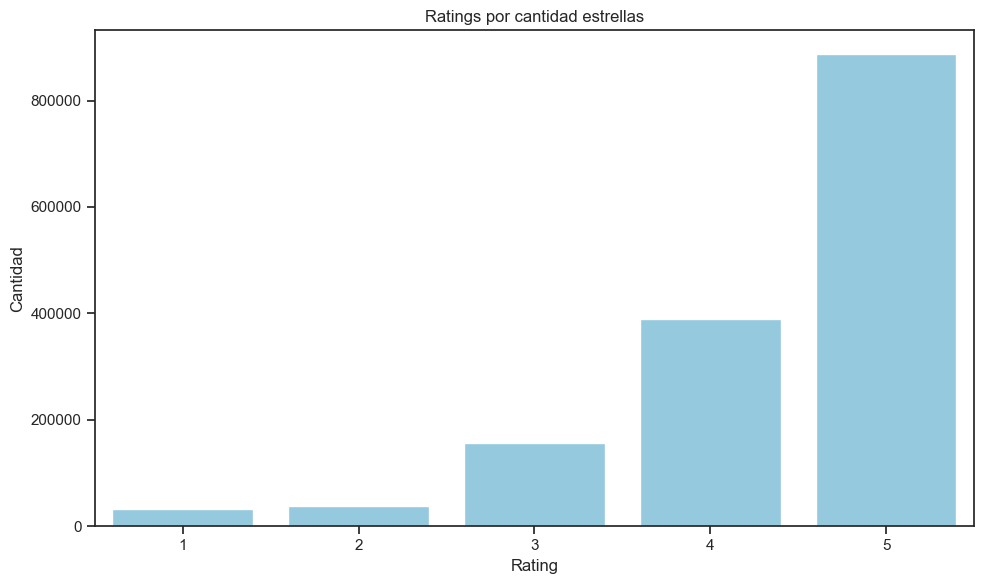

In [25]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_hawaii, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

la cantidad de reseñas con 5 estrellas supera pormucho a las que tienen una sola estrella, esto puede ser posible en ocasiones por alguna promocion del establecimiento o por el buen servicio, la cantidad de reseñas de 5  estrellas es mayor al 50% de el total de las reseñas 

<Figure size 1500x1000 with 0 Axes>

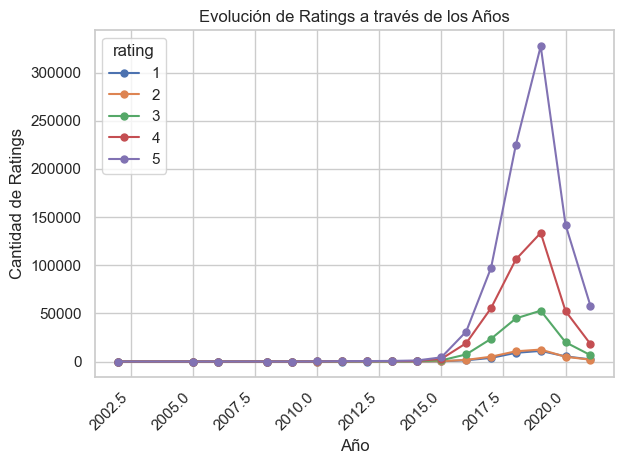

In [27]:
# Extraer el año de la columna 'fecha'
df_hawaii['year'] = pd.to_datetime(df_hawaii['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_hawaii.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se puede observar que la evolucion de los raitings no tuvo un fuerte movimiento a partir del año 2016, eso podria ser posible por el crecimiento exponencial de las redes sociales y el uso de aplicaciones para buscar recomendaciones como Google Maps, el decrecimiento que se observa al final del año 2020 puede ser posible por la pandemia global "COVID-19" que mantuvo a la poblacion en casa sin poder salir a ningun lugar.

* Rating 5: Esta línea muestra un aumento significativo alrededor del año 2015, alcanzando su punto máximo en 2017 con más de 300,000 ratings. Sin embargo, después de 2017, experimentó una disminución drástica. Esto podría indicar un cambio en la percepción de los usuarios o en la calidad del servicio/producto evaluado.

* Ratings 1 y 2: Estos ratings han permanecido relativamente bajos y constantes a lo largo del tiempo, lo que podría sugerir que la mayoría de los usuarios están satisfechos con el servicio/producto.

* Rating 3: Este rating tuvo un pequeño pico alrededor del año 2017. Esto podría indicar una variación en las opiniones de los usuarios durante ese período.

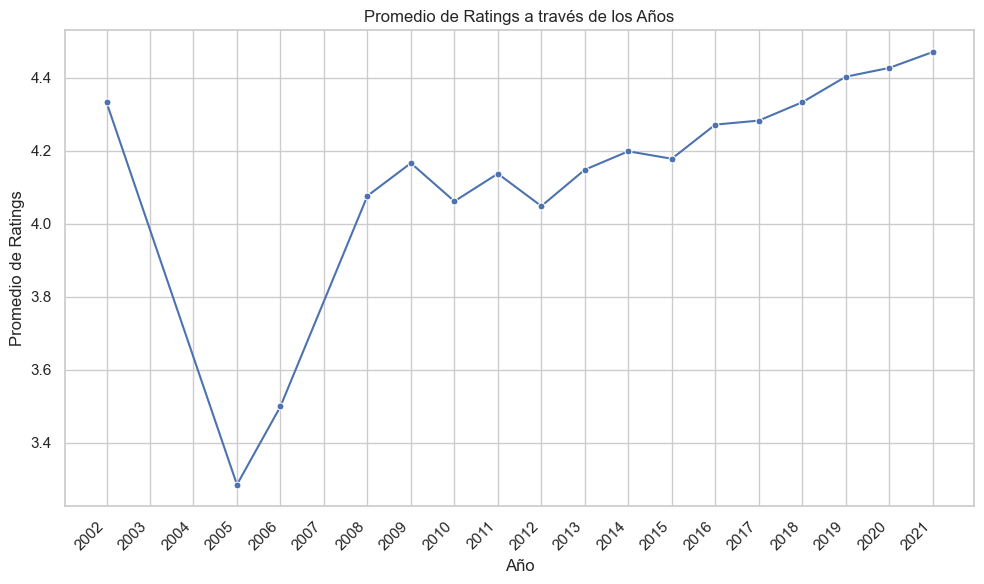

In [29]:
# Extraer el año de la columna 'fecha'
df_hawaii['year'] = pd.to_datetime(df_hawaii['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_hawaii.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico muestra el promedio de ratings a lo largo de los años.
* Tendencia general: La línea del gráfico muestra una tendencia general al alza, lo que indica que el promedio de ratings ha aumentado con el tiempo. Esto podría sugerir una mejora en la calidad del servicio/producto evaluado o un cambio en la percepción de los usuarios.

* Caída entre 2002 y 2006: Hay una caída significativa en el promedio de ratings entre los años 2002 y 2006. Esto podría indicar un problema con el servicio/producto durante ese período o un cambio en la forma en que los usuarios proporcionaban sus ratings.

* Aumento después de 2006: Después de la caída entre 2002 y 2006, el promedio de ratings aumentó de manera constante hasta 2021. Esto podría indicar una mejora continua en la calidad del servicio/producto o un cambio en las expectativas de los usuarios.

* En general, parece que la calidad del servicio/producto evaluado ha mejorado con el tiempo, según lo indicado por el aumento en el promedio de ratings.

In [38]:
# Extraer el año de la columna 'fecha'
df_hawaii['year'] = pd.to_datetime(df_hawaii['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_hawaii.groupby('year').size()
# Mostrar el resultado
df_reviews = pd.DataFrame(reviews_per_year)

df_reviews

,0
year,
2002,3
2005,7
2006,2
2008,39
2009,12
2010,145
2011,922
2012,1166
2013,1386
